In [45]:
import matplotlib.pyplot as plt
import pandas as pd

Para iniciar, podemos crear un figura y ejes

In [46]:
# cargamos la tabla con la que vamos a trabajar
seattle_weather = pd.read_csv('seattle_weather.csv')

# sacamos las columnas que queremos sin indices
MLY_PRCP_NORMAL = seattle_weather.pivot_table(values='MLY-PRCP-NORMAL', index = 'DATE').reset_index()
MLY_CLDD_NORMAL = seattle_weather.pivot_table(values='MLY-CLDD-NORMAL', index='DATE').reset_index()

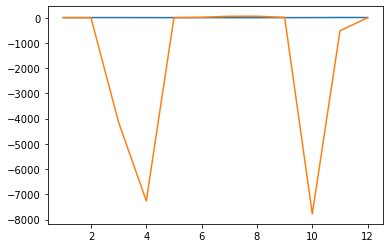

In [47]:
fig, ax = plt.subplots()
ax.plot(MLY_PRCP_NORMAL['DATE'], MLY_PRCP_NORMAL['MLY-PRCP-NORMAL'])
ax.plot(MLY_CLDD_NORMAL['DATE'], MLY_CLDD_NORMAL['MLY-CLDD-NORMAL'])
plt.show()

# notemos que como hay una gran variación entre numeros, el gráfico se ve mal

Para editar un poco los gráficos, podemos cambiarle el color indicando el parámetro color en el método .plot(), de igual manera podemos cambiar si queremos que los datos presentes en la tabla queden resaltados por una bola o un triángulo, lo hacemos con el parámetro marker='o' ó 'v' y para cambiar el tipo de línea, usamos el parámetro linestyle='--'

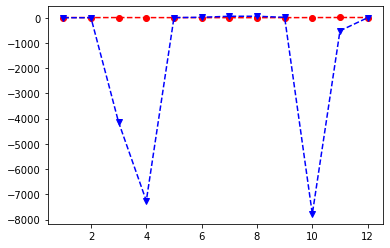

In [48]:
fig, ax = plt.subplots()
ax.plot(MLY_PRCP_NORMAL['DATE'], MLY_PRCP_NORMAL['MLY-PRCP-NORMAL'],color='r', marker='o', linestyle='--')
ax.plot(MLY_CLDD_NORMAL['DATE'], MLY_CLDD_NORMAL['MLY-CLDD-NORMAL'],color='b', marker='v', linestyle='--')
plt.show()

Si queremos ponerle nombres a los ejes, así como poner un título, lo hacemos con los siquientes comandos

ax.set_xlabel() (para nombrar eje y), ax.set_ylabel(), ax.set_title() para el título

Si queremos que multiples gráficos aparezcan en cuadros distintos, lo podemos hacer de la siguiente manera

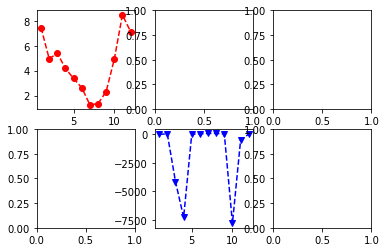

In [49]:
fig, ax = plt.subplots(2,3)
# con el parámetro en subplots(2,3) creamos un arreglo de 2x3 graficos

ax[0,0].plot(MLY_PRCP_NORMAL['DATE'], MLY_PRCP_NORMAL['MLY-PRCP-NORMAL'],color='r', marker='o', linestyle='--')
ax[1,1].plot(MLY_CLDD_NORMAL['DATE'], MLY_CLDD_NORMAL['MLY-CLDD-NORMAL'],color='b', marker='v', linestyle='--')
# indexando ax[0,0] y ax[1,1] indicamos que queremos el gráfico en el primer arreglo y el en 5 

plt.show()

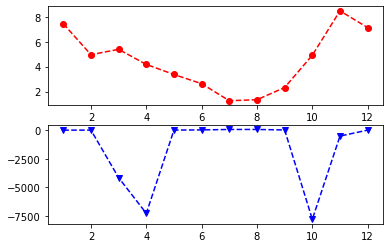

In [50]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(MLY_PRCP_NORMAL['DATE'], MLY_PRCP_NORMAL['MLY-PRCP-NORMAL'],color='r', marker='o', linestyle='--')
ax[1].plot(MLY_CLDD_NORMAL['DATE'], MLY_CLDD_NORMAL['MLY-CLDD-NORMAL'],color='b', marker='v', linestyle='--')
# al momento de indexar, da lo mismo si en subplots(1,2)

plt.show()

Si lo que queremos es que las gráficas tengan la misma escala, ponemos el parámetro sharey=True en subplots()

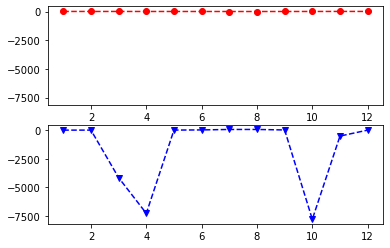

In [51]:
fig, ax = plt.subplots(2, 1, sharey=True)

ax[0].plot(MLY_PRCP_NORMAL['DATE'], MLY_PRCP_NORMAL['MLY-PRCP-NORMAL'],color='r', marker='o', linestyle='--')
ax[1].plot(MLY_CLDD_NORMAL['DATE'], MLY_CLDD_NORMAL['MLY-CLDD-NORMAL'],color='b', marker='v', linestyle='--')

plt.show()

## Graficando datos de series de tiempo

In [52]:
climate_change = pd.read_csv('climate_change.csv',parse_dates=['date'], index_col='date')

# al indicar estos parámetros, le indicamos que la columna 'date', en efecto, se trata de una columna 
# que contiene fechas, también fijamos como indice del dataframe a esta columna

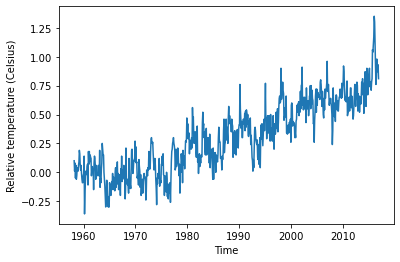

In [53]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['relative_temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Relative temperature (Celsius)')
plt.show()

Podemos indexar entre fechas de la siguiente manera

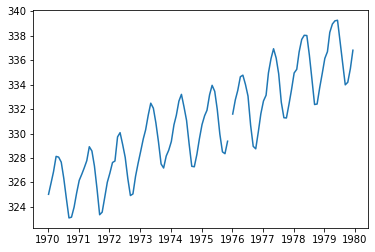

In [54]:
fig, ax = plt.subplots()

# creamos una variable que contenga los datos entre las fechas de "1970-01-01" a "1979-12-31"
seventies = climate_change['1970-01-01':'1979-12-31']
ax.plot(seventies.index, seventies["co2"])
plt.show()

# notemos que los valores faltantes se ven representados como discontinuidades

## Método .twinx

Para añadir dos gráficas con distinta escala, lo podemos hacer con .twinx(), el cual hará que las gráficas compartan el eje x 

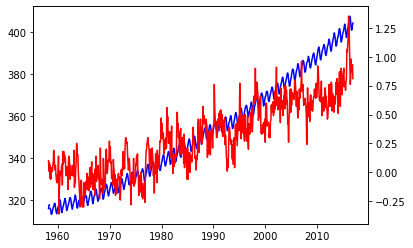

In [55]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'], color='b')

ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

Si queremos que las leyendas de los ejes también aparezcan con algún color, podemos hacerlo con .tick_params(). Todo queda resumido en la siguiente función

In [56]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # graficamos los datos y asignamos el color deseado
  axes.plot(x, y, color=color)

  # Nombramos el eje x
  axes.set_xlabel(xlabel)

  # Nombramos el eje y
  axes.set_ylabel(ylabel, color=color)

  # Asignamos un color a la leyenda del eje y
  axes.tick_params('y', colors=color)

Usando la información que teníamos antes y la función antes definida

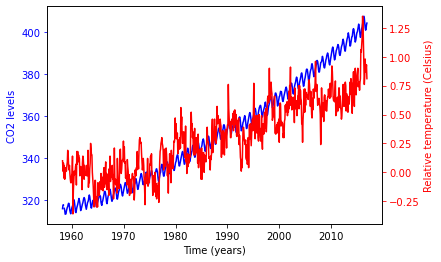

In [57]:
fig, ax = plt.subplots()

# niveles de c02 en azul
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', 'CO2 levels')

ax2 = ax.twinx()

# temperatura relativa
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temperature (Celsius)')

plt.show()

## Método annotate

Este método nos sirve para hacer anotaciones sobre las gráficas 

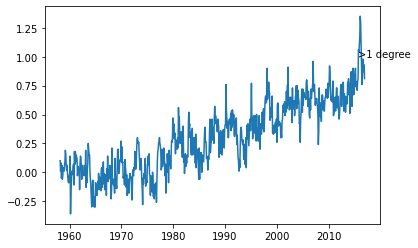

In [58]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['relative_temp'])

# el primer argumento indica la nota que vamos a poner en el gráfico,  mientras que el segundo parámetro indica la posición
ax.annotate('>1 degree', (pd.Timestamp('2015-10-06'), 1))
# esta nota trata de indicar dónde se comenzó a exceder el 1
plt.show()

Podemos añadir flechas y mover el texto de la siguiente manera

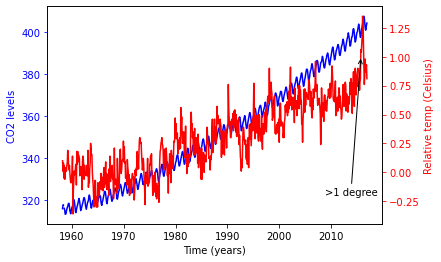

In [59]:
fig, ax = plt.subplots()

# usamos la función que definimos anteriormente
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

ax2 = ax.twinx()

plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# en el primer argumento, ponemos el texto que queremos ver, el segundo parámetro indicamos el punto crítico en el gráfico que se quiere señalar
# xytext ponemos en donde queremos mover el texto
# arrowprops indicamos que queremos una flecha que apunte al punto xy, también indicamos el tipo de flecha y el color 
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), 
            xytext=(pd.Timestamp('2008-10-06'), -0.2),
            arrowprops={'arrowstyle':'->', 'color':'black'})

plt.show()

## Gráfica de barras

Este tipo de gráficos los creamos de la siguiente manera

In [60]:
# dataframe a trabajar
medals = pd.read_csv('medals_by_country_2016.csv', index_col = 0)

<ipython-input-61-a77a8f92067c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 45)


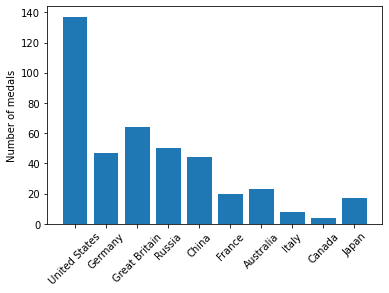

In [61]:
fig, ax = plt.subplots()

# grafica de barras de las medallas de oro en función de cada país
ax.bar(medals.index, medals['Gold'])

# ponemos los paises como las leyendas del eje x y rotamos 90 grados
ax.set_xticklabels(medals.index, rotation = 45)

ax.set_ylabel('Number of medals')

plt.show()

Podemos encimar información en un mismo gráfico de la siguiente manera

<ipython-input-62-c2c48b8b57ff>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 45)


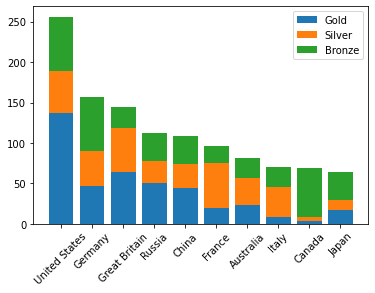

In [62]:
fig, ax = plt.subplots()

# primero hacemos el gráfico de barras para las medallas de oro y ponemos la etiqueta correspondiente indicado con label
ax.bar(medals.index, medals['Gold'], label='Gold')

# 'por debajo' de la gráf de barras de medallas de oro, pondremos la gráfica de barras de las medallas de plata, indicando el parámetro bottom
# bottom = medals['Gold'] nos indica que queremo que las medallas de plata aparezcan por debajo de las medallas de oro
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# aquí en el parámetro bottom = bottom=medals['Gold'] + medals['Silver'] indicamos que queremos que las medallas de bronze aparezcan por 
# debajo de las medallas de oro y plata
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'], label='Bronze')

# agregamos una leyenda con los colores de cada medalla
ax.legend()
ax.set_xticklabels(medals.index, rotation = 45)
plt.show()

## Histogramas

In [63]:
summer_2016_medals = pd.read_csv('summer2016.csv')
mens_gymnastics = summer_2016_medals.query('Sport == "Gymnastics" and Sex == "M"')
mens_rowing = summer_2016_medals.query('Sport == "Rowing" and Sex == "M"')

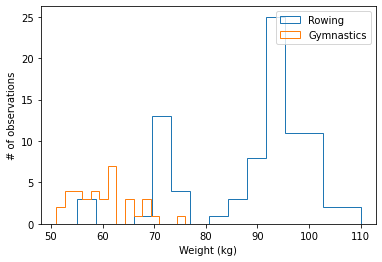

In [64]:
fig, ax = plt.subplots()

# el parámetro histtype = 'step' hace que solo se vea el contorno del gráfico
ax.hist(mens_rowing['Weight'], label = 'Rowing', histtype = 'step', bins = 15)

ax.hist(mens_gymnastics['Weight'], label = 'Gymnastics', histtype = 'step', bins = 15)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

## Gráficos utilizados en estadística

### Barras 

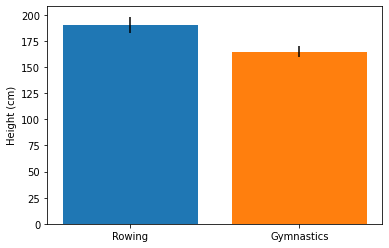

In [65]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr= mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar('Gymnastics', mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Barras de error

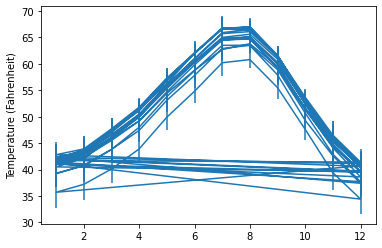

In [66]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['DATE'], seattle_weather['MLY-TAVG-NORMAL'], yerr= seattle_weather['MLY-TAVG-STDDEV'])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

### Box plot

Este gráfico nos dice la media de la distribución así como el rango intercuartilico de los datos entre los percentiles 25 y 75. Las lineas que aparerán arriba y abajo de la 'caja' indican una y media mas el tamaño del rango intercuartil más allá de los percentiles 75 y 25. Los puntos que aparecen, son datos anormales.

Text(0, 0.5, 'Height (cm)')

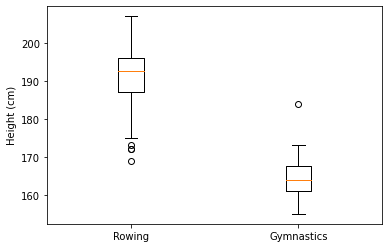

In [67]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')


## Gráfico de dispersión

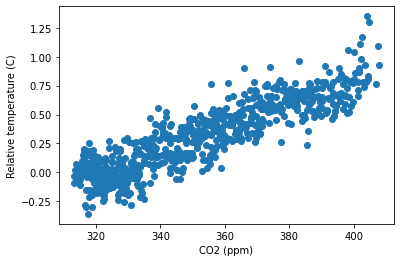

In [68]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

Podemos añadir múltiples colores con el siguiente parámetro

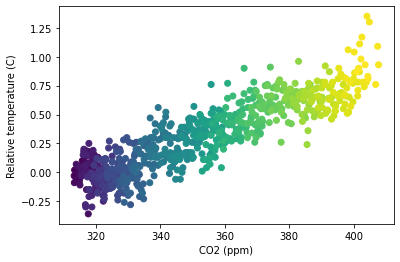

In [69]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c = climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

# conforme el tiempo avanza los puntos se van tornando de un color mas claro

## Diversos formatos para gráficos

Podemos agregar diversos formatos como el de ggplot o el de tableau

Para más formatos: https://www.dunderdata.com/blog/view-all-available-matplotlib-styles

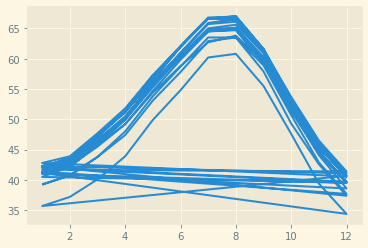

In [73]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

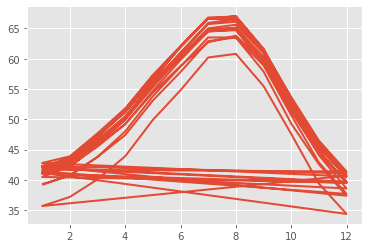

In [75]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

Para guardar las imágenes, lo hacemos con el método 

fig.savefig('my_figure.png') # donde podemos especificar el tipo en el que queremos que de guarde la imágen

Podemos también cambiar el tamaño de la imágen con el siguiente método

fig.set_size_inches([3,4]) donde la lista indica que queremos la imágen de 3 x 4 pulgadas

<ipython-input-82-692765c82ea6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(summer_2016_medals['Sport'].unique(), rotation=90)


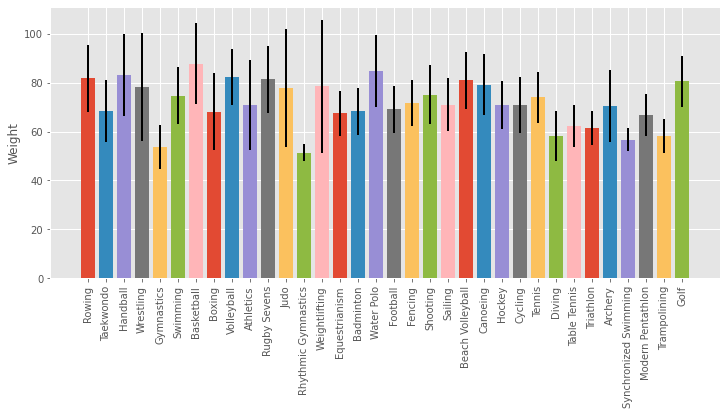

In [82]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in summer_2016_medals['Sport'].unique():
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(summer_2016_medals['Sport'].unique(), rotation=90)

# cambiamos el tamaño de la imagen
fig.set_size_inches([12,5])
plt.show()